In [1]:
## load packages
suppressPackageStartupMessages({
  library(emmeans)
  library(ggh4x)
  library(Hmisc)
  library(janitor)
  library(phyloseq)
  library(scales)
  library(tidyverse)
})

In [2]:
## paths to directories
repo <- file.path("/Users/abandla/Desktop/2_research/1_manuscripts/2_2020_brunei_peat_fire")
data <- file.path(repo, "1_data")
figures <- file.path(repo, "3_figures")

In [3]:
## define global theme options for plotting
btp_theme <- theme(
  axis.text = element_text(size = 16, color = "black"),
  axis.text.y = element_text(margin = margin(0, 10, 0, 10)),
  axis.text.x = element_text(margin = margin(10, 0, 10, 0)),
  axis.title = element_text(size = 18),
  axis.ticks.length = unit(.25, "cm"),
  panel.border = element_rect(linewidth = 0.5, fill = NA),
  panel.background = element_rect(fill = NA),
  panel.grid = element_blank(),
  legend.text = element_text(size = 16),
  legend.title = element_text(size = 18),
  legend.key = element_rect(fill = NA),
  legend.background = element_rect(fill = NA)
)

In [4]:
## import environmental data
btp_env_depth <- read.csv(file.path(data, "1_metadata", "2020_btp_depth_env_data.csv"))

In [5]:
## summarise
btp_env_depth_figure <- btp_env_depth %>%
  pivot_longer(-c(sample, psf_type, depth), names_to = "variable", values_to = "value") %>%
  group_by(psf_type, variable, depth) %>%
  ggplot(., aes(x = depth, y = value, color = psf_type)) +
  geom_point(position = position_dodge(width = 0.8), shape = 1, size = 4, stroke = 1.3) +
  facet_wrap(
    ~variable,
    scales = "free",
    strip.position = "left",
    labeller = as_labeller(c(
      "DO" = "DO (mg/L)",
      "EC" = "EC (µS/cm)",
      "TDS" = "TDS (mg/L)",
      "pH" = "pH",
      "salinity" = "Salinity (‱)",
      "water_temperature" = "Temperature (°C)"
    ))
  ) +
  coord_cartesian(clip = "off") +
  btp_theme +
  theme(
    aspect.ratio = 1,
    legend.position = "bottom",
    strip.text.y = element_text(size = 18),
    axis.text.x = element_text(size = 18),
    strip.background = element_rect(fill = NA),
    strip.placement = "outside",
    panel.spacing = unit(1, "lines"),
    panel.grid.major = element_line(color = "#d3d3d3"),
    panel.grid.minor = element_line(color = "#d3d3d3"),
  ) +
  xlab("Depth") +
  ylab("") +
  guides(
    shape = guide_legend(title = "Depth")
  ) +
  scale_color_manual(
    "PSF",
    values = c("#e66101", "#1a9641"),
    labels = c("Burnt", "Intact")
  ) +
  scale_x_discrete(labels = c("Surface", "Mid", "Deep")) +
  facetted_pos_scales(y = list(
    variable == "DO (mg/" ~ scale_y_continuous(limits = c(0, 5), n.breaks = 3),
    variable == "EC" ~ scale_y_continuous(limits = c(0, 200), n.breaks = 3),
    variable == "TDS" ~ scale_y_continuous(limits = c(0, 120), n.breaks = 3),
    variable == "pH" ~ scale_y_continuous(limits = c(0, 6), n.breaks = 3),
    variable == "salinity" ~ scale_y_continuous(limits = c(0, 0.1), n.breaks = 3),
    variable == "water_temperature" ~ scale_y_continuous(limits = c(24, 28), n.breaks = 3)
  ))

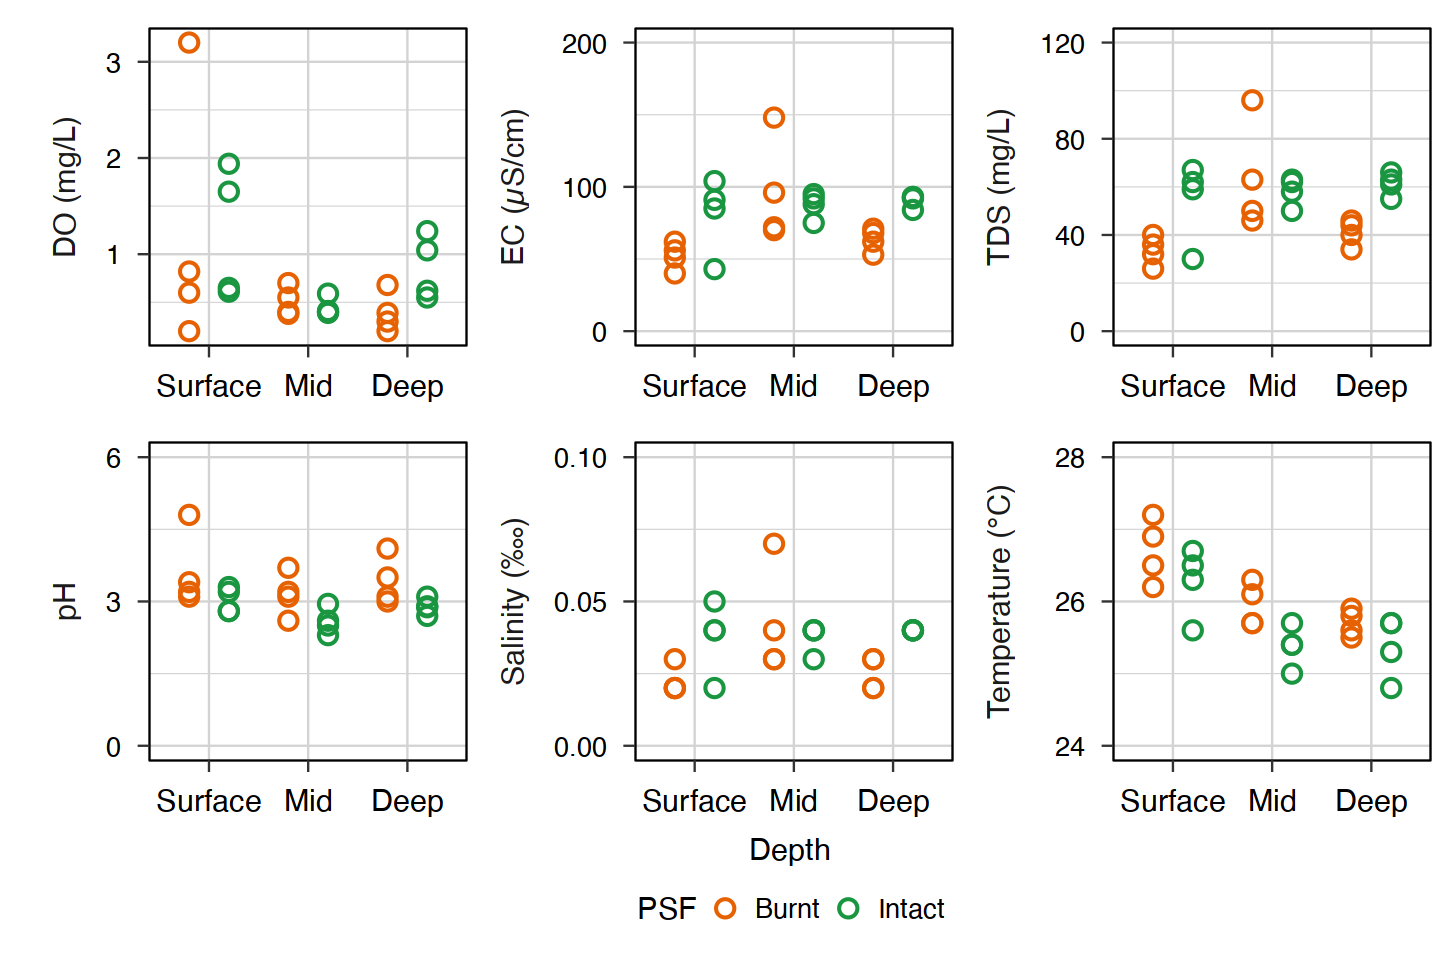

In [6]:
## view plot
options(repr.plot.width = 12, repr.plot.height = 8)
btp_env_depth_figure

In [7]:
## export figure
pdf(file.path(figures, "2_supplementary", "1_porewater_quality.pdf"), width = 12, height = 8)
btp_env_depth_figure
dev.off()

pdf 
  2

In [8]:
## ANOVA water temperature
water_temperature_anova <- aov(water_temperature ~ psf_type + depth, data = btp_env_depth)
summary(water_temperature_anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
psf_type     1  1.170  1.1704   9.379  0.00615 ** 
depth        2  4.263  2.1317  17.082 4.71e-05 ***
Residuals   20  2.496  0.1248                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [9]:
## pairwise comparisons
## reference: https://cran.r-project.org/web/packages/emmeans/vignettes/AQuickStart.html#additive
emmeans(water_temperature_anova, pairwise ~ depth)$contrasts

 contrast           estimate    SE df t.ratio p.value
 (0-5) - (35-40)       0.825 0.177 20   4.671  0.0004
 (0-5) - (95-100)      0.950 0.177 20   5.378  0.0001
 (35-40) - (95-100)    0.125 0.177 20   0.708  0.7618

Results are averaged over the levels of: psf_type 
P value adjustment: tukey method for comparing a family of 3 estimates 

In [10]:
## ANOVA pH
ph_anova <- aov(pH ~ psf_type + depth, data = btp_env_depth)
summary(ph_anova)

            Df Sum Sq Mean Sq F value  Pr(>F)   
psf_type     1  1.910   1.910  10.159 0.00463 **
depth        2  0.854   0.427   2.271 0.12915   
Residuals   20  3.760   0.188                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [11]:
## ANOVA EC
ec_anova <- aov(EC ~ psf_type + depth, data = btp_env_depth)
summary(ec_anova)

            Df Sum Sq Mean Sq F value Pr(>F)  
psf_type     1   1441  1441.5   3.358 0.0818 .
depth        2   2628  1314.0   3.061 0.0692 .
Residuals   20   8586   429.3                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [12]:
## ANOVA DO
do_anova <- aov(DO ~ psf_type + depth, data = btp_env_depth)
summary(do_anova)

            Df Sum Sq Mean Sq F value Pr(>F)  
psf_type     1  0.116  0.1162   0.298 0.5910  
depth        2  2.387  1.1934   3.064 0.0691 .
Residuals   20  7.790  0.3895                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1